## Clustering

In [12]:
#----- Librerías a emplear -----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

In [13]:
#----- Cargamos nuestra data -----
data = pd.read_csv("GitHub/python-ml-course/datasets/movies/movies.csv", sep = ";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [14]:
#----- Tomamos únicamente lo que nos interesa -----
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [15]:
#----- DISTANCIAS -----
# En base a la distancia de Minkowsi tenemos:
# p=1 -> Distancia de Manhattan   |   p=2 -> Distancia Euclidea

dd1 = distance_matrix(data[movies], data[movies], p = 1)
dd2 = distance_matrix(data[movies], data[movies], p = 2)
dd10 = distance_matrix(data[movies], data[movies], p = 10)

In [16]:
#----- Pasamos la matriz de distancias a dataframe -----
def dm_to_df(dd, col_name):
    import pandas as pd
    return pd.DataFrame(dd, index = col_name, columns = col_name)

In [17]:
#---- Visualización de los DataFrames -----
# Observaremos que las distancias más cortas son las de p = 10
dm_to_df(dd1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [18]:
dm_to_df(dd2, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [19]:
dm_to_df(dd10, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [20]:
#----- Librería para gráficas 3D -----
from mpl_toolkits.mplot3d import Axes3D

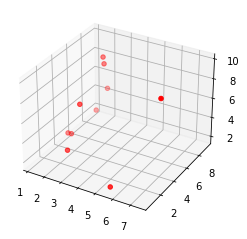

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs = data["harry_potter"], c = "red" )

### Clustering jerárquico

In [22]:
#----- Importamos las librerías a usar -----
from scipy.cluster.hierarchy import dendrogram, linkage
# dendrogram -> Dendrograma   |   linkage -> enlace de datos

In [23]:
#----- Visualizamos nuestro dataframe -----
print(movies)
print("")
print(data[movies])

['star_wars', 'lord_of_the_rings', 'harry_potter']

   star_wars  lord_of_the_rings  harry_potter
0        1.2                4.9           2.1
1        2.1                8.1           7.9
2        7.4                3.0           9.9
3        5.6                0.5           1.8
4        1.5                8.3           2.6
5        2.5                3.7           6.5
6        2.0                8.2           8.5
7        1.8                9.3           4.5
8        2.6                1.7           3.1
9        1.5                4.7           2.3


[[ 0.          9.          0.41231056  2.        ]
 [ 1.          6.          0.6164414   2.        ]
 [ 4.          7.          2.16794834  2.        ]
 [ 3.          8.          3.48281495  2.        ]
 [ 5.         10.          5.2943366   3.        ]
 [13.         14.          6.59317829  5.        ]
 [11.         12.          6.66408283  4.        ]
 [ 2.         15.         10.62355873  6.        ]
 [16.         17.         12.8156935  10.        ]]


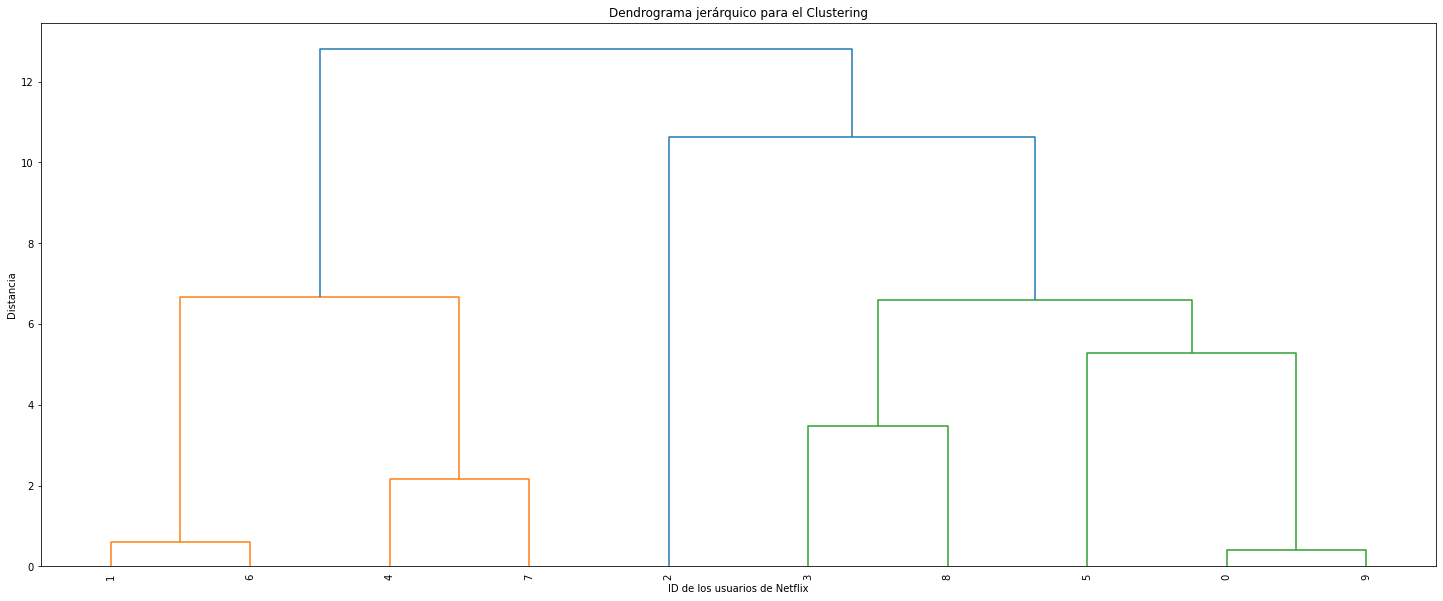

In [24]:
Z = linkage(data[movies], "ward") # Ward es el tipo de enlace
                                  # (single, average, complete, etc)
print(Z)
plt.figure(figsize = (25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90, leaf_font_size = 10)
plt.show()

[[1.00000000e+00 6.00000000e+00 5.73982302e-04 2.00000000e+00]
 [0.00000000e+00 7.00000000e+00 2.20254553e-03 2.00000000e+00]
 [9.00000000e+00 1.10000000e+01 2.85017067e-03 3.00000000e+00]
 [4.00000000e+00 1.20000000e+01 6.21188529e-03 4.00000000e+00]
 [2.00000000e+00 8.00000000e+00 1.41238086e-02 2.00000000e+00]
 [5.00000000e+00 1.00000000e+01 4.10208532e-02 3.00000000e+00]
 [1.40000000e+01 1.50000000e+01 4.82230673e-02 5.00000000e+00]
 [1.30000000e+01 1.60000000e+01 4.99162497e-02 9.00000000e+00]
 [3.00000000e+00 1.70000000e+01 1.89817411e-01 1.00000000e+01]]


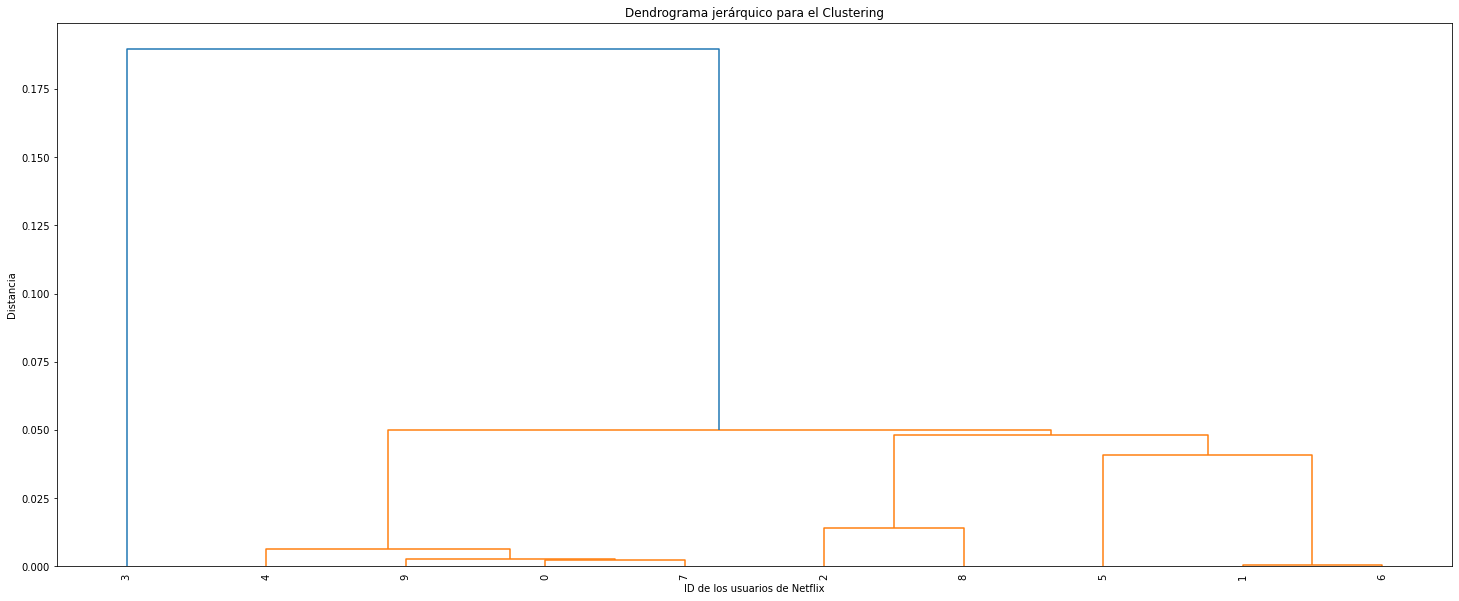

In [25]:
# Podemos crear el enlace especificado en método y función de distancia
Z = linkage(data[movies], method ="single", metric = "cosine")
print(Z)
plt.figure(figsize = (25, 10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90, leaf_font_size = 10)
plt.show()

### Clustering jerárquico y dendrogramas

In [26]:
# Realizamos un nuevo ejemplo con mayor cantidad de datos
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

(150, 2)


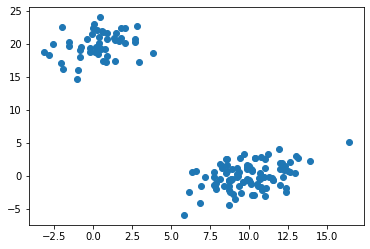

In [27]:
np.random.seed(4711) # Colocamos una semilla para nuestros valores aleatorios

# Generamos datos aleatorios
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size = [100, ])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size = [50, ])
X = np.concatenate((a, b)) # Concatenamos nuestros datos
print(X.shape) # Tamaño de nuestra matriz
plt.scatter(X[:, 0], X[:, 1]) # Gráfica de datos, todas las filas para las columnas 0 y 1
plt.show() # Visualización

In [28]:
# Declaramos nuestra matriz de enlace
Z = linkage(X, "ward")

In [29]:
#----- Importación de librerías -----
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [30]:
# Cophenetic distance: ¿Qué tan similares deben ser los datos
# para pertenecer a un mismo cluster?
c, coph_dist = cophenet(Z, pdist(X)) #Cálculo de la distancia euclidiana
c

0.9800148387574268

In [31]:
# Obtenemos nuestros 2 puntos, distancia, número de elementos
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [32]:
# Visualizamos los últimos 20 datos de nuestra matriz de enlace
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [33]:
print(Z[152 - len(X)]) # Cluster 152

[33.         68.          0.07106779  2.        ]


In [34]:
# Además del punto 33 y 68, otro punto cercano a 152 es 62,
# como se puede visualizar en la tabla anterior y aquí:
X[[33, 68, 62]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 9.97792822, -0.56383202]])

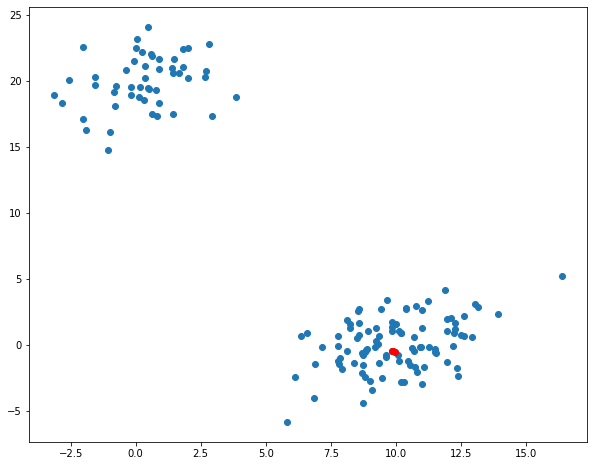

In [35]:
idx = [33, 68, 62] # Puntos de interés
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1]) # Graficamos todos los puntos
plt.scatter(X[idx, 0], X[idx, 1], c = "r") # Graficamos los puntos de interés
plt.show()

#### Representación gráfica de un dendrograma

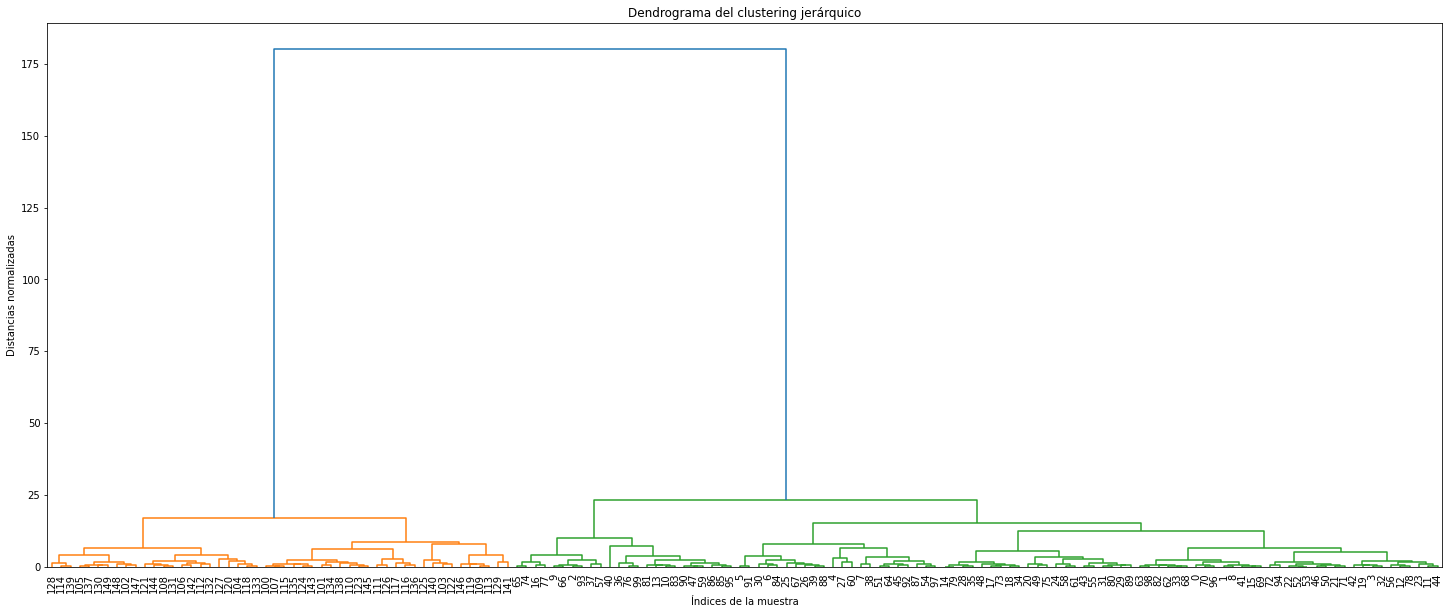

In [36]:
plt.figure(figsize = (25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias normalizadas")
# color_threshold: umbral para pintar, por defecto es 70% (180 valor máximo de nuestro cluster)
dendrogram(Z, leaf_rotation = 90.0, leaf_font_size = 10.0, color_threshold = 0.7*180)
plt.show()

#### Truncamiento del dendrograma

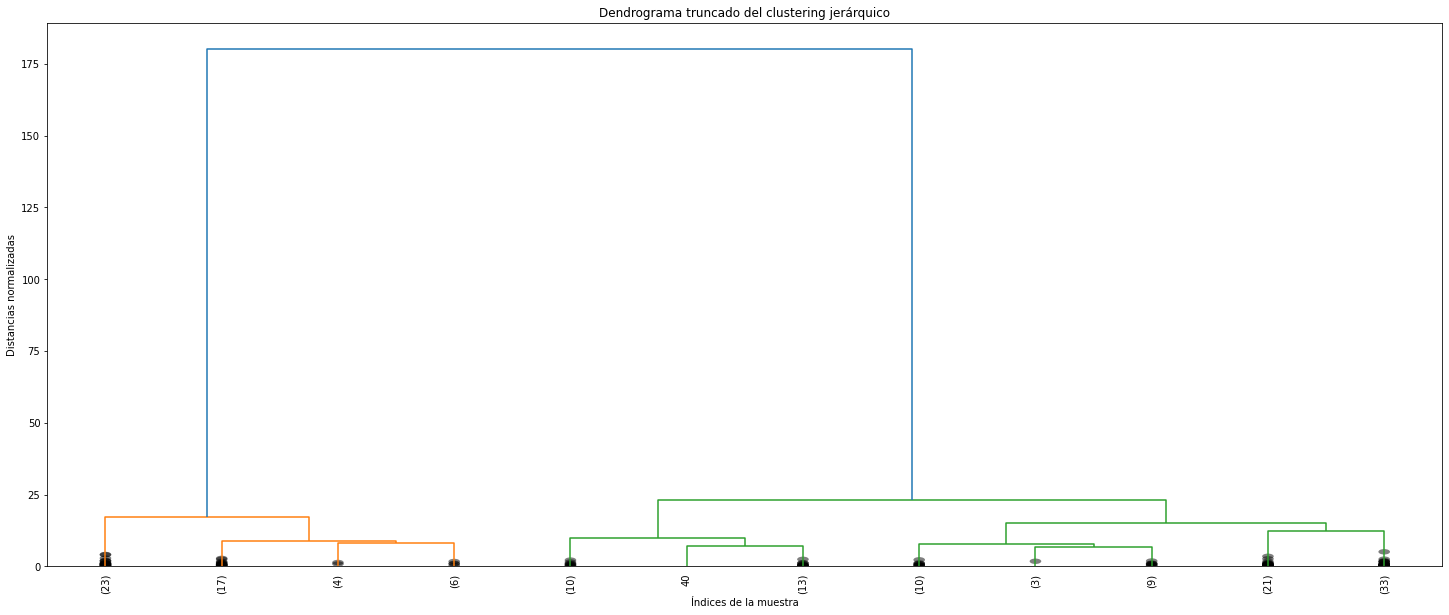

In [37]:
plt.figure(figsize = (25, 10))
plt.title("Dendrograma truncado del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias normalizadas")
# truncate_mode: toma los último p cluster unidos
# show_leaf_counts: Visualización de la data en los ejes
# show_contracted: Visualización del truncamiento
dendrogram(Z, leaf_rotation = 90.0, leaf_font_size = 10.0, color_threshold = 0.7*180,
          truncate_mode = "lastp", p = 12, show_leaf_counts = True, show_contracted = True)
plt.show()

#### Dendrograma personalizado

In [38]:
def dendrogram_tune(*args, **kwargs):
    
    max_d = kwargs.pop("max_d", None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get("no_plot", False):
        plt.title("Clustering jerárquico con dendrograma personalizado")
        plt.xlabel("Índice del dataset (tamaño del cluster)")
        plt.ylabel("Distancia normalizada")
        
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x, y, "o", c = c)
                plt.annotate("%.3g"%y, (x, y), xytext = (0, -5),
                            textcoords = "offset points", va = "top", ha = "center")
                
    if max_d:
        plt.axhline(y = max_d, c = "k")
        
    return ddata

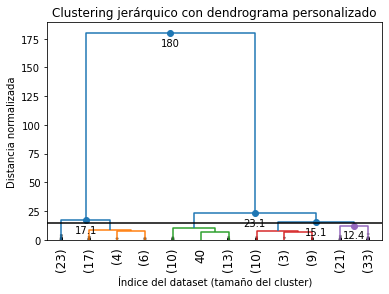

In [39]:
dendrogram_tune(Z, truncate_mode = "lastp", p = 12, leaf_rotation = 90.0, leaf_font_size = 12.0,
               show_contracted = True, annotate_above = 10, max_d = 15)
plt.show()

### Método del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


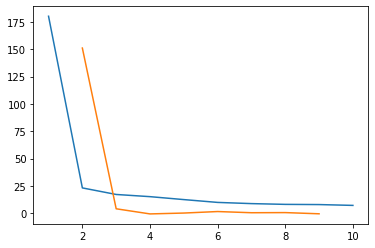

In [40]:
# Otra perspectiva del clustering y dendrograma
last = Z[-10:, 2] # Tomamos las últimas 10 distancias
last_rev = last[::-1] # Invertimos nuestro vector
print(last_rev) # Imprimimos

# Gráfica de las distancias
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2) # Restamos cada punto con el siguiente
acc_rev = acc[::-1] # Invertimos
# Graficamos la diferencia de distancias entre puntos
plt.plot(idx[:-2]+1, acc_rev)
plt.show()

(750, 2)


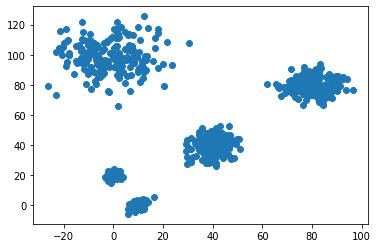

In [41]:
# Otro ejemplo de clustering
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size = [200, ])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size = [200, ])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size = [200, ])
X2 = np.concatenate((X, c, d, e)) # Concatenamos nuestros datos
print(X2.shape) # Tamaño de nuestra matriz
plt.scatter(X2[:, 0], X2[:, 1]) # Gráfica de datos, todas las filas para las columnas 0 y 1
plt.show() # Visualización

In [42]:
Z2 = linkage(X2, "ward")

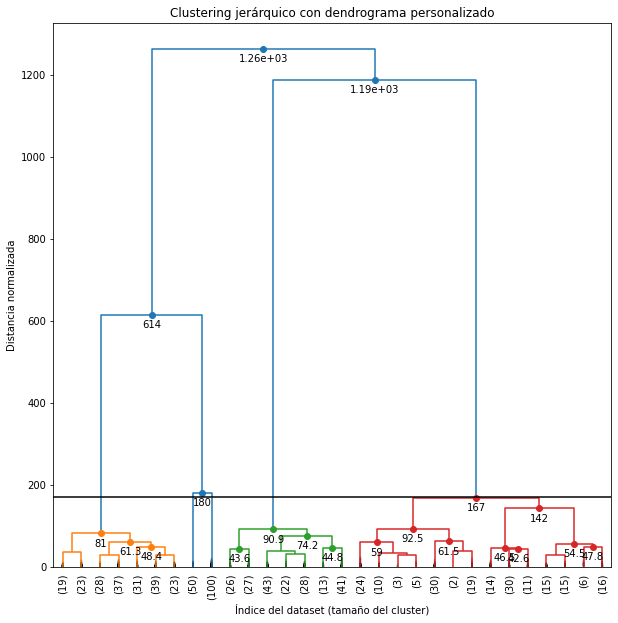

In [43]:
plt.figure(figsize = (10, 10))
dendrogram_tune(Z2, truncate_mode = "lastp", p = 30, leaf_rotation = 90.0,
               leaf_font_size = 10.0, show_contracted = True, annotate_above = 40, max_d = 170)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


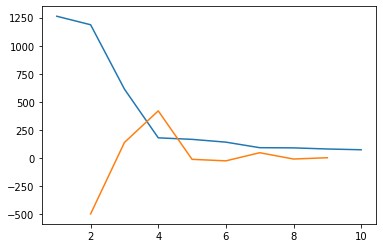

El número óptimo de cluster es 4


In [44]:
# Método del codo
last = Z2[-10:, 2] # Tomamos las últimas 10 distancias
last_rev = last[::-1] # Invertimos nuestro vector
print(last_rev) # Imprimimos

# Gráfica de las distancias
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2) # Restamos cada punto con el siguiente
acc_rev = acc[::-1] # Invertimos
# Graficamos la diferencia de distancias entre puntos
plt.plot(idx[:-2]+1, acc_rev)
plt.show()

k = acc_rev.argmax() + 2
print("El número óptimo de cluster es %s"%str(k))

#### Recuperación de clusters y sus elementos

In [45]:
from scipy.cluster.hierarchy import fcluster

In [46]:
max_d = 25 # Corte por distancia
clusters = fcluster(Z, max_d, criterion = "distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
k = 3 # Corte por número de cluster
clusters = fcluster(Z, k, criterion = "maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [48]:
# Pasamos nuestra matriz enlace, mínimo de elementos para un cluster y profundidad
fcluster(Z, 8, depth = 10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

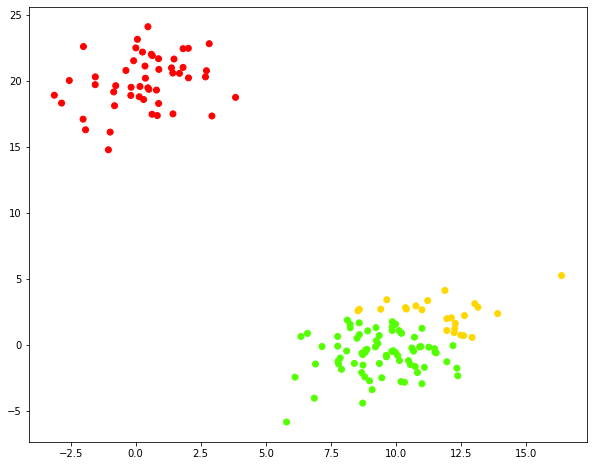

In [49]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = "prism")
plt.show()

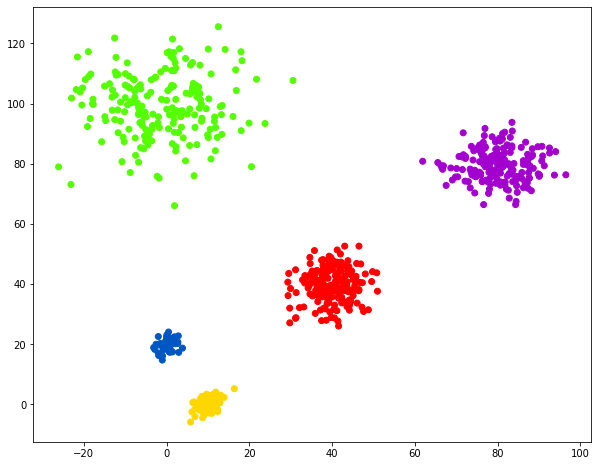

In [50]:
max_d = 170
clusters = fcluster(Z2, max_d, criterion = "distance")
clusters

plt.figure(figsize = (10, 8))
plt.scatter(X2[:, 0], X2[:, 1], c = clusters, cmap = "prism")
plt.show()